## <span style="color:RoyalBlue">2016 Ratings for Young Adult (YA) Books</span>
#### <span style="color:Navy">Author: Jessica Marx</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime, timedelta
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

pd.options.display.max_columns = None

In [2]:
ya_books = pd.read_csv('ya_books_2016.csv')

In [3]:
print(ya_books.describe())
ya_books.head()

       Star rating  Number of reviews      Length
count   100.000000          100.00000  100.000000
mean      4.315000          164.55000  327.440000
std       0.399842          261.62601  116.095861
min       3.000000            1.00000   52.000000
25%       4.000000           28.00000  242.000000
50%       4.500000           74.50000  323.000000
75%       4.500000          179.00000  400.000000
max       5.000000         1591.00000  793.000000


Book title        Author name  \
0                                           Mistrust  Margaret McHeyzer   
1                                     Girl in Pieces   Kathleen Glasgow   
2                                        Just Juliet   Charlotte Reagan   
3  Dork in Love ~ Tales of My Dorky Love Life: Te...         Ann Writes   
4  Warrior Cats: Battle (Warrior Cats (Werecat YA...       Tiyana Angel   

   Star rating  Number of reviews  Length             Publisher  
0          4.5                 64     333               Amazon   
1          4.5                139     418             Delacorte  
2          4.5                369     224                Inkitt  
3          4.5                  9     122               Amazon   
4          5.0                  1      52  Guardian Angel Press

In [4]:
# make column names more functional
def snake_case(df):
    '''
    make all columns in a dataframe snake case (lower with underscores as separator)
    '''
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(' ', '_')
    return df

ya_books = snake_case(ya_books)
print(set(ya_books.columns))

{'author_name', 'star_rating', 'number_of_reviews', 'publisher', 'book_title', 'length'}


4.5    53
4.0    33
5.0     9
3.0     3
3.5     2
Name: star_rating, dtype: int64


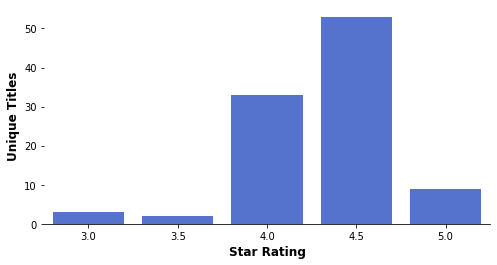

In [5]:
# we are solving for star rating, so let's take a look at what that distribution looks like
print(ya_books['star_rating'].value_counts())

# looks like there are only 5 possible values in this dataset; we'll graph to make it easier to visualize
plt.figure(figsize=(8,4))
axes = sns.countplot(ya_books['star_rating'], color="RoyalBlue")
axes.set_xlabel('Star Rating', fontsize = 12, fontweight = 'semibold')
axes.set_ylabel('Unique Titles', fontsize = 12, fontweight = 'semibold')
sns.despine(left = True)
plt.show()

In [6]:
# look at the highest rated titles and their features
ya_books.sort_values(by='star_rating', ascending=False)[:20]

book_title             author_name  \
81           Draken (The Southern Fire Series Book 1)               S.B. Nova   
90                            My Hero Academia, Vol 5         Kohei Horikoshi   
46                               The Thousandth Floor         Katharine McGee   
45                                  Capture the World              R.K. Ryals   
12                           Hunger Is the Best Sauce                Z.A. Coe   
91               Nyssa Glass and the House of Mirrors              H.L. Burke   
85                                  Traveler (Seeker)       Arwen Elys Dayton   
28                                       Age of Order            Julian North   
4   Warrior Cats: Battle (Warrior Cats (Werecat YA...            Tiyana Angel   
42               Elementals 2: The Blood of the Hydra          Michelle Madow   
51                   Elementals 3: The Head of Medusa          Michelle Madow   
84                       The General (Cherub Book 10)        Robert Muchamore   
86                       Walk the Edge (Thunder Road)           Katie McGarry   
40                                        Purple Moon        Tessa Emily Hall   
87                                    We Are the Ants  Shaun David Hutchinson   
83                                        Alterations         Stephanie Scott   
48                                        Dragonbound     Chelsea M. Campbell   
82                                              Style      Chelsea M. Cameron   
1                                      Girl in Pieces        Kathleen Glasgow   
0                                            Mistrust       Margaret McHeyzer   

    star_rating  number_of_reviews  length  \
81          5.0                  9     376   
90          5.0                 23     192   
46          5.0                155     448   
45          5.0                 28     199   
12          5.0                  7     269   
91          5.0                 73     158   
85          5.0                 58     402   
28          5.0                 18     339   
4           5.0                  1      52   
42          4.5                177     310   
51          4.5                114     279   
84          4.5                 19     353   
86          4.5                121     441   
40          4.5                 86     265   
87          4.5                 93     465   
83          4.5                 20     237   
48          4.5                 92     290   
82          4.5                 50     242   
1           4.5                139     418   
0           4.5                 64     333   

                                 publisher  
81                                 Amazon   
90                               VIZ Media  
46                HarperCollins Publishers  
45                                 Amazon   
12                                 Amazon   
91                                 Amazon   
85                               Delacorte  
28                           Plebian Media  
4                     Guardian Angel Press  
42                   Dreamscape Publishing  
51                   Dreamscape Publishing  
84                             Simon Pulse  
86                          Harlequin Teen  
40  Lighthouse Publishing of the Carolinas  
87                             Simon Pulse  
83                        Bloomsbury Spark  
48                               Skyscrape  
82                                 Amazon   
1                                Delacorte  
0                                  Amazon

In [7]:
# percent of books with 4.5 of more (regardless of number of reviews)
len(ya_books[ya_books['star_rating'] >= 4.5])

62

In [8]:
# percent of books with 100 or more reviews (regardless of ratings)
len(ya_books[ya_books['number_of_reviews'] >= 100])

41

In [9]:
# median number of reviews by publisher
ya_publishers = ya_books.groupby('publisher').agg({'number_of_reviews': 'median', 'star_rating':'median', 'book_title':'count'}).reset_index()
ya_publishers['high_rating_by_medians'] = np.where((ya_publishers['star_rating'] >= 4.5) & (ya_publishers['number_of_reviews'] >= 100), 1, 0)
ya_publishers.sort_values(by=['high_rating_by_medians', 'book_title'], ascending=False)

publisher  number_of_reviews  star_rating  \
14                               Delacorte              218.0         4.50   
46                               Skyscrape              150.0         4.50   
26                          Harlequin Teen              121.0         4.50   
18                   Dreamscape Publishing              145.5         4.50   
37                          Philomel Books              404.5         4.50   
16                  Disney Lucasfilm Press              476.0         4.50   
20                         Entangled: Teen              577.0         4.50   
21                          Flatiron Books              159.0         4.50   
22                       Greenwillow Books              369.0         4.50   
31                                  Inkitt              369.0         4.50   
39                              Pottermore             1591.0         4.50   
44                      Simon and Schuster              218.0         4.50   
45                           Siobhan Davis              203.0         4.50   
53                                 Timeout              554.0         4.50   
0                                  Amazon                64.0         4.50   
27                HarperCollins Publishers              164.0         4.00   
5                       BLVNP Incorporated               39.5         4.00   
43                             Simon Pulse               19.0         4.50   
4            Atheneum/Caitlyn Dlouhy Books               85.0         4.50   
8                 Bloomsbury USA Childrens              705.0         4.00   
15                         Disney Hyperion              171.0         4.25   
33           Knopf Books for Young Readers              117.5         4.25   
1                             Amulet Books               34.0         4.50   
2                       Amy Sparling Books               32.0         4.00   
3                      Another World Press              135.0         4.00   
6                         Blaze Publishing               40.0         4.00   
7                         Bloomsbury Spark               20.0         4.50   
9                    Blue Tulip Publishing               25.0         4.00   
10                              Candlewick               28.0         4.00   
11           Crown Books for Young Readers               27.0         4.00   
12                      Darwin House Press               12.0         4.50   
13                            DashingBooks               52.0         4.00   
17                            Disney Press               49.0         4.00   
19                        Entangled: Crush               33.0         4.00   
23                    Guardian Angel Press                1.0         5.00   
24             HMH Books for Young Readers              111.0         4.00   
25                    Harlequin Kimana TRU                2.0         3.00   
28                              HarperTeen              239.0         4.00   
29                        Hatco Publishing               12.0         4.50   
30                   Hollis Thatcher Press               29.0         4.50   
32                   Katherine Tegen Books               36.0         3.50   
34  Lighthouse Publishing of the Carolinas               86.0         4.50   
35                         Mind Mess Press               27.0         4.50   
36                             Month9Books               76.0         4.00   
38                           Plebian Media               18.0         5.00   
40    Random House Books for Young Readers               29.0         4.50   
41                         Scholastic Inc.               85.0         4.00   
42                Show not Tell Publishing               11.0         4.50   
47                               Soho Teen               48.0         4.00   
48                    St. Martin's Griffin               28.0         4.00   
49                             Swoon Reads             

In [10]:
# some of the top-rated titles have very few reviews; the botton 25% was 28 reviews
# the prompt said that high-rated needed to be 4.5 AND more than 100 reviews
ya_books_new = ya_books.copy()
ya_books_new['high_rating'] = np.where((ya_books_new['star_rating'] >= 4.5) & (ya_books_new['number_of_reviews'] >= 100), 1, 0)
print(ya_books_new['high_rating'].value_counts())
high_pct = np.round(len(ya_books_new[ya_books_new['high_rating'] ==1])/len(ya_books_new), 2)
print(f"Percent of titles with a high rating: {high_pct*100.00}%")


0    73
1    27
Name: high_rating, dtype: int64
Percent of titles with a high rating: 27.0%


In [11]:
# i also noticed that some of the books on this list are part of a series
# that's indicated *usually* by the title haveing parantheses or a number in it; adding that feature
# note: i realize this step could be tightened up, but for this exercise i think it's ok
# title length might also indicate this
ya_books_new['title_length'] = ya_books_new['book_title'].str.len()
ya_books_new['is_series'] = ya_books_new['book_title'].str.contains(pat="[\d]|\(").astype(int)

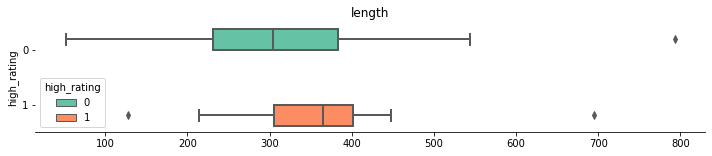

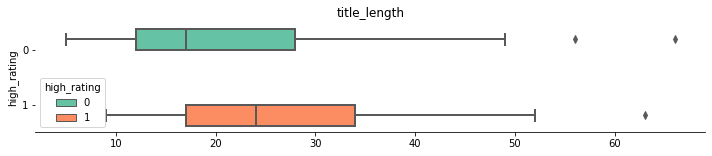

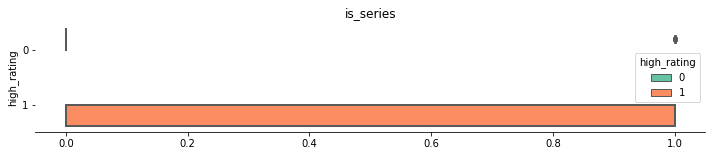

In [12]:
num_cols = ya_books_new.select_dtypes(include=np.number).columns.tolist()
feature_cols = num_cols.copy()
feature_cols = [e for e in feature_cols if e not in ('star_rating', 'high_rating', 'number_of_reviews')]

for col in range(len(feature_cols)):
    plt.figure(figsize=(12, 2))
    axes = sns.boxplot(data = ya_books_new, x = f"{feature_cols[col]}", y = 'high_rating'
                       , hue='high_rating', saturation=1, palette='Set2'
                       , linewidth=2, fliersize=5, orient='h')
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"{feature_cols[col]}")
    axes.set_xlabel('', fontsize = 12, fontweight = 'semibold')
    sns.despine(left = True)
    plt.show()

In [13]:
# let's look at the probability of getting a high rating given who your publisher is prob(high_rating | publisher)
ya_bayes = ya_books_new.groupby('high_rating').publisher.apply(lambda g: g.value_counts()/len(g)).reset_index()
ya_bayes = ya_bayes.rename(columns={'publisher': 'prob', 'level_1': 'publisher'})
ya_bayes[ya_bayes['high_rating'] == 1]

high_rating                      publisher      prob
45            1                      Delacorte  0.185185
46            1          Dreamscape Publishing  0.074074
47            1       HarperCollins Publishers  0.074074
48            1                 Philomel Books  0.074074
49            1                        Amazon   0.074074
50            1       Bloomsbury USA Childrens  0.037037
51            1             Simon and Schuster  0.037037
52            1                         Inkitt  0.037037
53            1         Disney Lucasfilm Press  0.037037
54            1                      Skyscrape  0.037037
55            1  Atheneum/Caitlyn Dlouhy Books  0.037037
56            1                  Siobhan Davis  0.037037
57            1                     Pottermore  0.037037
58            1                 Harlequin Teen  0.037037
59            1                 Flatiron Books  0.037037
60            1                Entangled: Teen  0.037037
61            1              Greenwillow Books  0.037037
62            1                Disney Hyperion  0.037037
63            1                        Timeout  0.037037

In [14]:
ya_bayes_wide = ya_bayes.pivot_table(index=["publisher"], 
                    columns='high_rating', 
                    values='prob').reset_index()
ya_bayes_wide = ya_bayes_wide.fillna(0)
ya_bayes_wide['higher_prob_of_high'] = np.where(ya_bayes_wide[1] > ya_bayes_wide[0], 1, 0)
ya_bayes_wide[ya_bayes_wide['higher_prob_of_high']==1].sort_values(by=1, ascending=False)

high_rating                      publisher         0         1  \
14                               Delacorte  0.027397  0.185185   
27                HarperCollins Publishers  0.068493  0.074074   
18                   Dreamscape Publishing  0.000000  0.074074   
37                          Philomel Books  0.000000  0.074074   
4            Atheneum/Caitlyn Dlouhy Books  0.013699  0.037037   
45                           Siobhan Davis  0.000000  0.037037   
44                      Simon and Schuster  0.000000  0.037037   
39                              Pottermore  0.000000  0.037037   
31                                  Inkitt  0.000000  0.037037   
22                       Greenwillow Books  0.000000  0.037037   
26                          Harlequin Teen  0.027397  0.037037   
8                 Bloomsbury USA Childrens  0.013699  0.037037   
21                          Flatiron Books  0.000000  0.037037   
20                         Entangled: Teen  0.000000  0.037037   
16                  Disney Lucasfilm Press  0.000000  0.037037   
15                         Disney Hyperion  0.013699  0.037037   
53                                 Timeout  0.000000  0.037037   

high_rating  higher_prob_of_high  
14                             1  
27                             1  
18                             1  
37                             1  
4                              1  
45                             1  
44                             1  
39                             1  
31                             1  
22                             1  
26                             1  
8                              1  
21                             1  
20                             1  
16                             1  
15                             1  
53                             1

In [15]:
# Delacorte gives you the best odds.
# note: if this were a real-world problem, i'd want to go by last year's publisher data (and impute for new publishers)
ya_books_new['top_publisher'] = ya_books_new['publisher'].str.contains(pat="Delacorte").astype(int)

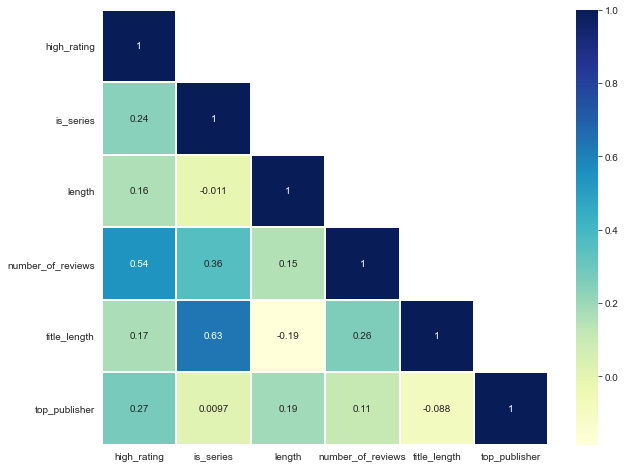

In [16]:
# let's look at highly correlated features
num_cols_2 = ya_books_new.select_dtypes(include=np.number).columns.tolist()
df_matrix = ya_books_new[num_cols_2]
df_matrix = df_matrix.drop('star_rating', axis=1)
ordered_cols = sorted(set(df_matrix.columns)) # this just makes 'high_rating' the first column 
df_matrix = df_matrix[ordered_cols]
corr = df_matrix.corr(method='pearson')

sns.set_style('white')
plt.figure(figsize = (10, 8))

# only lower half of matrix
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
sns.heatmap(df_lt, cmap="YlGnBu", linecolor="white", linewidths=1, annot=True)
plt.show()

In [17]:
df_classifier = ya_books_new[num_cols_2].drop(['star_rating', 'number_of_reviews'], axis=1)

# see if data is imbalanced (it is)
df_classifier['high_rating'].value_counts()

0    73
1    27
Name: high_rating, dtype: int64

In [18]:
def plot_conf_matrix(y_true, y_pred, name):
    '''
    function to plot a confusion matrix
    '''
    conf_mat = confusion_matrix(y_true, y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    conf_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         conf_mat.flatten()/np.sum(conf_mat)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(9, 7))
    sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print(f"Accuracy score is: {np.round(accuracy_score(y_true, y_pred)*100.00, 2)}%")

In [19]:
train_class, test_class = train_test_split(df_classifier,
                                test_size = 0.2, 
                                random_state = 123,
                                shuffle=True
                               )

train_y_class = train_class['high_rating']
train_x_class = train_class.drop('high_rating', axis=1)

test_y_class = test_class['high_rating']
test_x_class = test_class.drop('high_rating', axis=1)

class_model = RandomForestClassifier(random_state = 123, n_estimators=5000, class_weight='balanced')

# fit on training data
class_model.fit(train_x_class, train_y_class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [20]:
# What is baseline? 
print(f"Baseline accuracy score is: {np.round((len(df_classifier[df_classifier['high_rating'] == 1])/len(df_classifier))*100,2)} %")

Baseline accuracy score is: 27.0 %


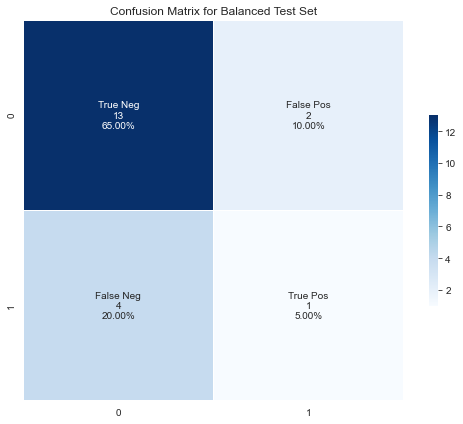

Accuracy score is: 70.0%


In [21]:
y_pred = class_model.predict(test_x_class)  
plot_conf_matrix(y_true = test_y_class, y_pred = y_pred, name = "Balanced Test Set") 

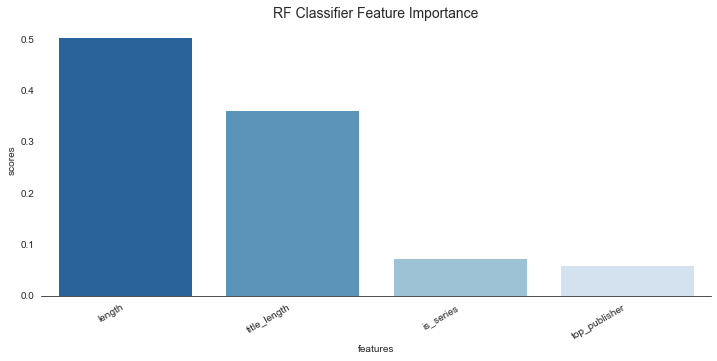

In [22]:
# not bad as this is for exploratory purposes; let's look at the feature importance scores for guidance
columns = test_x_class.columns

feat_imp = pd.DataFrame()
feat_imp['scores'] = class_model.feature_importances_
feat_imp['features'] = pd.Series(columns)
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=feat_imp.sort_values(by='scores', ascending=False)[:20]
    , x='features', y='scores', palette='Blues_r'
                )
plt.title(f"RF Classifier Feature Importance", size=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')    
sns.despine(left=True)
plt.show()

In [23]:
# the model was fitted using balanced data, so let's look at the features from the original dataset only this time we'll balance it. 
df_classifier_balanced = df_classifier[df_classifier['high_rating'] == 1].reset_index(drop=True)
temp = df_classifier[df_classifier['high_rating'] == 0].sample(len(df_classifier_balanced))
temp = df_classifier[df_classifier['high_rating'] == 0].sample(len(df_classifier_balanced))
df_classifier_balanced = pd.concat([df_classifier_balanced, temp], axis=0).reset_index(drop=True)
df_classifier_balanced['high_rating'].value_counts()

1    27
0    27
Name: high_rating, dtype: int64

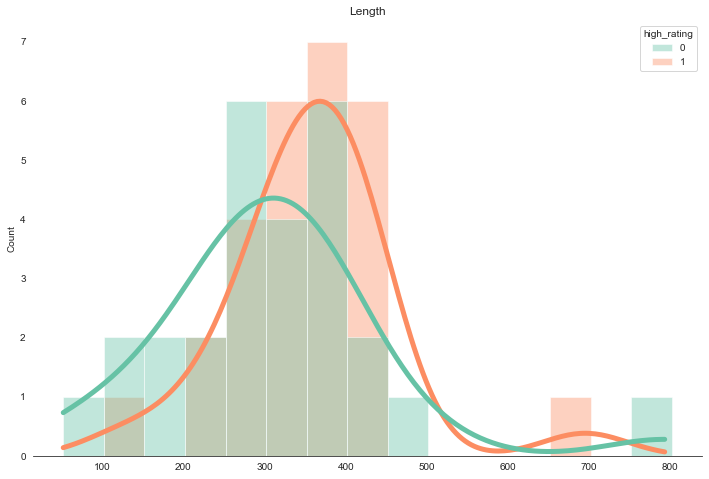

In [24]:
# length is interesting... let's take a look
plt.figure(figsize=(12, 8))
axes = sns.histplot(data = df_classifier_balanced, x = 'length'
                   , hue='high_rating',palette='Set2', kde=True, binwidth=50
                   , alpha=.4, linewidth=.5, line_kws={'linewidth':5})
plt.ticklabel_format(style='plain', axis='x')
plt.title('Length')
axes.set_xlabel('', fontsize = 12, fontweight = 'semibold')
sns.despine(left = True)
plt.show()

In [25]:
print("Distribution of book length for high-rated titles:")
print(df_classifier[df_classifier['high_rating']==1]['length'].describe())
print("")
print("Distribution of book length for non-high-rated titles:")
print(df_classifier[df_classifier['high_rating']==0]['length'].describe())
# so it's more likely that a longer book will not be highly-rated
# a lot of this was indicated in the original box-plots

Distribution of book length for high-rated titles:
count     27.000000
mean     358.555556
std      101.212394
min      128.000000
25%      305.000000
50%      365.000000
75%      401.000000
max      695.000000
Name: length, dtype: float64

Distribution of book length for non-high-rated titles:
count     73.000000
mean     315.931507
std      119.733191
min       52.000000
25%      231.000000
50%      304.000000
75%      383.000000
max      793.000000
Name: length, dtype: float64
